# Capstone Project by Niklas

## Problem description & Background

Vehicle accidents can have tremendous impacts on a person's life - both from a health perspective but also on a financial one.
On those, multiple factors like traffic, rain, snow, wind,
or road conditions can determine the likeliness and severity of an accident.

*Can it be possible to determine and quantify the risk even before starting the engine by knowing certain conditions that can be expected during the ride?*

So, the goal of this research is to help people to evaluate the overall risk of a vehicle trip out of the combination of likeliness
of an accident and potential impact/severity, so that drivers can make better decisions for themselves and other people.

## Data description and usage to solve the problem

For this Capstone Project, a Collision data set will be used that includes information about almost 200,000 accidents recorded in Seattle, WA, since the year 2004.
From those accidents, 5085 did not involve vehicles but just pedestrians and cyclists. Those will be excluded from the analysis.
Overall, the data set contains various variables with possible influence on the target variable, the **SEVERITY** of an accident.
These predictor variables include the following:

- *WEATHER:* Describing weather conditions with attribute options like Clear, Overcast, Raining, Fog, Crosswind, Snow, and other
- *ROADCOND:* Describing road conditions with attribute options like Dry, Wet, Ice, Oil, Standing Water, and other
- *LIGHTCOND:* Describing light conditions with attribute options like Daylight, Dawn, and Dark with different status of artificial/street light
- *ADDRTYPE:* Describing the address type where a collision took place with the options Alley, Block, and Intersection
- *COLLISIONTYPE:* Describing the type of the collision with options like parked car, right turn, pedestrian, and others
- *VEHICLECOUNT:* Describing the number of vehicles involved in the accident
- *DATE/TIME:* Describing date and time of when the accident happened

Going forward, this data will be examined via exploratory analysis to identify the most influential predictor variables.


#### Methodology section

1. Exploratory Analysis

In [341]:
#import pandas

import pandas as pd

In [342]:
# import data

df_raw = pd.read_csv("Data-Collisions.csv")

In [343]:
df_columns = df_raw[['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND']]
df_cleaned = df_columns.copy()
df_cleaned.dtypes

SEVERITYCODE     int64
ADDRTYPE        object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

In [344]:
df_cleaned.dropna(inplace=True)

df_cleaned["ADDRTYPE"] = df_cleaned["ADDRTYPE"].astype('category')
df_cleaned["WEATHER"] = df_cleaned["WEATHER"].astype('category')
df_cleaned["ROADCOND"] = df_cleaned["ROADCOND"].astype('category')
df_cleaned["LIGHTCOND"] = df_cleaned["LIGHTCOND"].astype('category')

In [345]:
df_cleaned["ADDRTYPE"].value_counts()

Block           123321
Intersection     63462
Alley              742
Name: ADDRTYPE, dtype: int64

In [346]:
df_cleaned["WEATHER"].value_counts()

Clear                       110499
Raining                      32976
Overcast                     27551
Unknown                      14059
Snowing                        896
Other                          790
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [347]:
df_cleaned["ROADCOND"].value_counts()

Dry               123736
Wet                47223
Unknown            14009
Ice                 1193
Snow/Slush           992
Other                124
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64

In [348]:
df_cleaned["LIGHTCOND"].value_counts()

Daylight                    115408
Dark - Street Lights On      48236
Unknown                      12599
Dusk                          5843
Dawn                          2491
Dark - No Street Lights       1526
Dark - Street Lights Off      1184
Other                          227
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [349]:
df_cleaned["ADDRTYPE_INT"] = df_cleaned["ADDRTYPE"].cat.codes
df_cleaned["WEATHER_INT"] = df_cleaned["WEATHER"].cat.codes
df_cleaned["ROADCOND_INT"] = df_cleaned["ROADCOND"].cat.codes
df_cleaned["LIGHTCOND_INT"] = df_cleaned["LIGHTCOND"].cat.codes

In [350]:
df_cleaned.head(10)


,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE_INT,WEATHER_INT,ROADCOND_INT,LIGHTCOND_INT
0,2,Intersection,Overcast,Wet,Daylight,2,4,8,5
1,1,Block,Raining,Wet,Dark - Street Lights On,1,6,8,2
2,1,Block,Overcast,Dry,Daylight,1,4,0,5
3,1,Block,Clear,Dry,Daylight,1,1,0,5
4,2,Intersection,Raining,Wet,Daylight,2,6,8,5
5,1,Intersection,Clear,Dry,Daylight,2,1,0,5
6,1,Intersection,Raining,Wet,Daylight,2,6,8,5
7,2,Intersection,Clear,Dry,Daylight,2,1,0,5
8,1,Block,Clear,Dry,Daylight,1,1,0,5
9,2,Intersection,Clear,Dry,Daylight,2,1,0,5


In [351]:
addr_prob = pd.crosstab(index=df_cleaned["SEVERITYCODE"],
                           columns=df_cleaned["ADDRTYPE"], margins=True)

addr_prob.index = ["Property Damage", "Injury", "Total Column"]

addr_prob/addr_prob.loc["Total Column"]


ADDRTYPE,Alley,Block,Intersection,All
Property Damage,0.892183,0.761363,0.568655,0.696664
Injury,0.107817,0.238637,0.431345,0.303336
Total Column,1.000000,1.000000,1.000000,1.000000


In [352]:
weather_prob = pd.crosstab(index=df_cleaned["SEVERITYCODE"],
                           columns=df_cleaned["WEATHER"], margins=True)

weather_prob.index = ["Property Damage", "Injury", "Total Column"]

weather_prob/weather_prob.loc["Total Column"]

WEATHER,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown,All
Property Damage,0.734694,0.67673,0.669627,0.855696,0.683678,0.4,0.662179,0.72,0.758929,0.813616,0.943808,0.696664
Injury,0.265306,0.32327,0.330373,0.144304,0.316322,0.6,0.337821,0.28,0.241071,0.186384,0.056192,0.303336
Total Column,1.000000,1.00000,1.000000,1.000000,1.000000,1.0,1.000000,1.00,1.000000,1.000000,1.000000,1.000000


In [353]:
road_prob = pd.crosstab(index=df_cleaned["SEVERITYCODE"],
                           columns=df_cleaned["ROADCOND"], margins=True)

road_prob.index = ["Property Damage", "Injury", "Total Column"]

road_prob/road_prob.loc["Total Column"]

ROADCOND,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,All
Property Damage,0.677531,0.77368,0.625,0.66129,0.69863,0.833669,0.738739,0.947891,0.667535,0.696664
Injury,0.322469,0.22632,0.375,0.33871,0.30137,0.166331,0.261261,0.052109,0.332465,0.303336
Total Column,1.000000,1.00000,1.000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [354]:
light_prob = pd.crosstab(index=df_cleaned["SEVERITYCODE"],
                           columns=df_cleaned["LIGHTCOND"], margins=True)

light_prob.index = ["Property Damage", "Injury", "Total Column"]

light_prob/light_prob.loc["Total Column"]

LIGHTCOND,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown,All
Property Damage,0.781127,0.733953,0.701053,0.636364,0.669611,0.667181,0.668663,0.770925,0.95325,0.696664
Injury,0.218873,0.266047,0.298947,0.363636,0.330389,0.332819,0.331337,0.229075,0.04675,0.303336
Total Column,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


During the SVM ML analysis I detected the classification of all test data to 1 - property damage.
As a reason, the strong verhältnis from 70/30 (property/injury) in the data comes in frage.
therefore, the set will be resampled to go another iteration with all algorithms.

In [355]:
from sklearn.utils import resample

In [356]:
df_cleaned_majority = df_cleaned[df_cleaned.SEVERITYCODE==1]
df_cleaned_minority = df_cleaned[df_cleaned.SEVERITYCODE==2]

#Downsample majority class
df_cleaned_majority_new = resample(df_cleaned_majority,
                                        replace=False,
                                        n_samples=56883,
                                        random_state=247)

# Combine minority class with downsampled majority class
df_cleaned_bal = pd.concat([df_cleaned_majority_new, df_cleaned_minority])

# Display new class counts
df_cleaned_bal.SEVERITYCODE.value_counts()

2    56883
1    56883
Name: SEVERITYCODE, dtype: int64

In [357]:
import numpy as np

#split data

y_data = np.asarray(df_cleaned_bal['SEVERITYCODE'])
y_data[0:5]

array([1, 1, 1, 1, 1])

In [358]:
x_data = df_cleaned_bal.drop(['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND'], axis=1)
x_data = np.asarray(x_data)
x_data [0:5]


array([[1, 1, 1, 5],
       [1, 1, 0, 2],
       [1, 4, 0, 5],
       [1, 1, 0, 5],
       [1, 1, 0, 5]], dtype=int8)

In [359]:
from sklearn import preprocessing
x_data = preprocessing.StandardScaler().fit(x_data).transform(x_data)
x_data[0:5]

array([[-0.76, -0.72, -0.42,  0.4 ],
       [-0.76, -0.72, -0.69, -1.43],
       [-0.76,  0.4 , -0.69,  0.4 ],
       [-0.76, -0.72, -0.69,  0.4 ],
       [-0.76, -0.72, -0.69,  0.4 ]])

In [360]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

('number of test samples :', 17065)
('number of training samples:', 96701)


K - Nearest Neighbours

In [361]:
from sklearn.neighbors import KNeighborsClassifier

k = 13

#Train Model and Predict

neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [362]:
yhat_knn = neigh.predict(x_test)

yhat_knn[0:5]

array([1, 1, 1, 2, 1])

In [363]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

('Train set Accuracy: ', 0.5686704377410782)
('Test set Accuracy: ', 0.5647817169645473)


In [364]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat_knn=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)


    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])

mean_acc

array([0.52, 0.49, 0.55, 0.55, 0.57, 0.56, 0.58, 0.56, 0.56, 0.55, 0.56,
       0.55, 0.56, 0.55])

Plot models

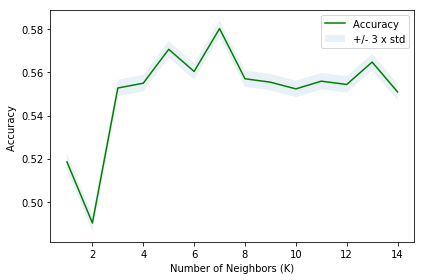

In [365]:
import matplotlib.pyplot as plt

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 x std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Decision tree

In [366]:
from sklearn.tree import DecisionTreeClassifier

In [367]:
df_cleaned_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
df_cleaned_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [368]:
df_cleaned_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [369]:
df_cleaned_predTree = df_cleaned_tree.predict(x_test)

print (df_cleaned_predTree [0:5])
print (y_test [0:5])

[1 2 1 2 2]
[2 2 1 1 2]


In [370]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, df_cleaned_predTree))

("DecisionTrees's Accuracy: ", 0.6090829182537357)


SVM

In [371]:
from sklearn import svm
clf = svm.SVC(kernel='poly', C=0.075)
clf.fit(x_train, y_train)

SVC(C=0.075, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [372]:
yhat_svm = clf.predict(x_test)
yhat_svm [0:25]

array([1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 2])

In [373]:
from sklearn.metrics import classification_report
import itertools


In [374]:
print (classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

           1       0.59      0.73      0.66      8649
           2       0.64      0.48      0.55      8416

   micro avg       0.61      0.61      0.61     17065
   macro avg       0.61      0.61      0.60     17065
weighted avg       0.61      0.61      0.60     17065



In [375]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=6, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [376]:
yhat_LR = LR.predict(x_test)
yhat_LR

array([1, 2, 1, ..., 1, 2, 1])

In [377]:

yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.55, 0.45],
       [0.43, 0.57],
       [0.55, 0.45],
       ...,
       [0.55, 0.45],
       [0.35, 0.65],
       [0.62, 0.38]])

In [378]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [379]:
jc_1=jaccard_similarity_score(y_test, yhat_knn)
fs_1=f1_score(y_test, yhat_knn, average='weighted')

jc_2=jaccard_similarity_score(y_test, df_cleaned_predTree)
fs_2=f1_score(y_test, df_cleaned_predTree, average='weighted')

jc_3=jaccard_similarity_score(y_test, yhat_svm)
fs_3=f1_score(y_test, yhat_svm, average='weighted')

jc4=jaccard_similarity_score(y_test, yhat_LR)
fs4=f1_score(y_test, yhat_LR, average='weighted')
ll4=log_loss(y_test, yhat_prob)

list_jc = [jc_1, jc_2, jc_3, jc4]
list_fs = [fs_1, fs_2, fs_3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]

In [380]:
import pandas as pd

# formulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.550952,0.547633,NA
Decision Tree,0.609083,0.602704,NA
SVM,0.608790,0.602132,NA
Logistic Regression,0.606622,0.601387,0.659954


2. Inferential statistical testing

3. Machine Learnings

#### Results

#### Discussion

#### Conclusion